<a href="https://colab.research.google.com/github/kimdesok/FinanceDataReader/blob/master/MarketIndexTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finance-dataReader==0.5.0

In [2]:
import FinanceDataReader as fdr

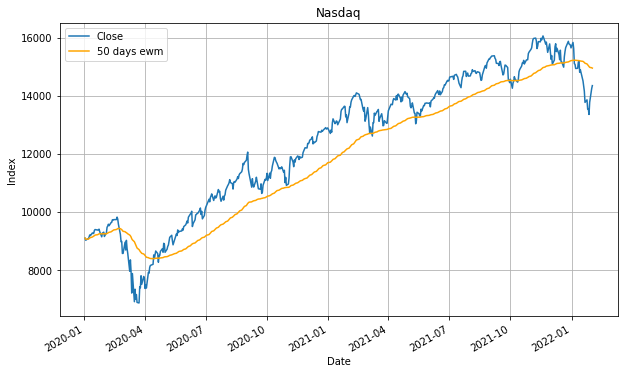

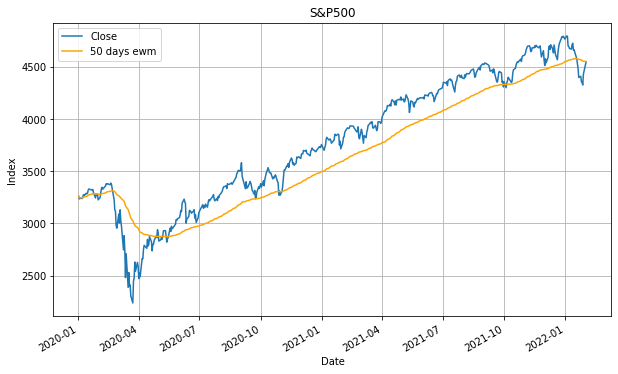

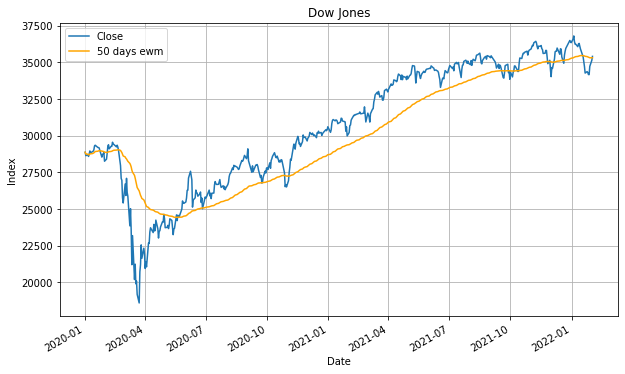

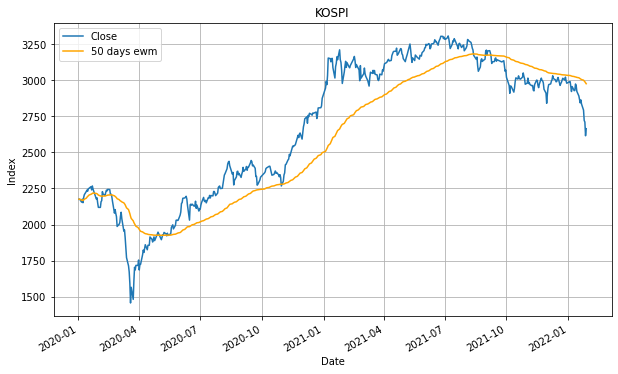

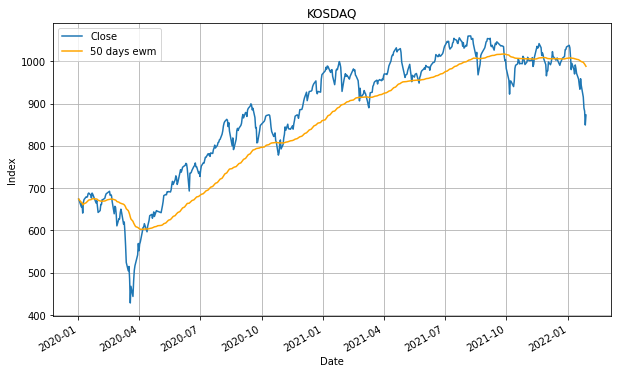

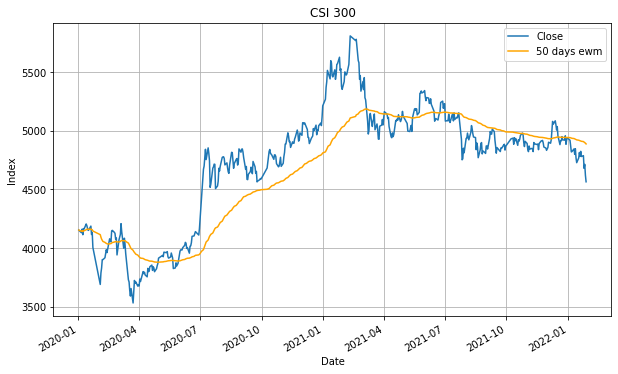

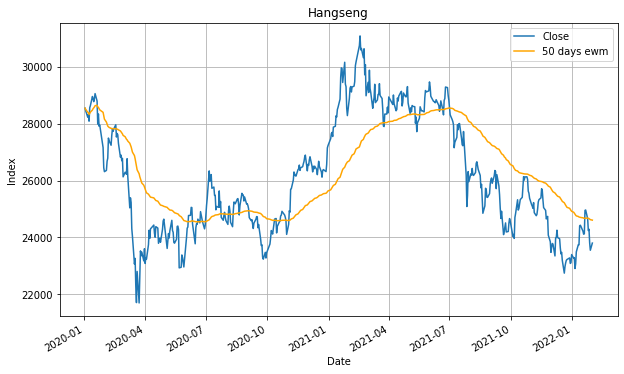

In [3]:
import matplotlib.pyplot as plt
from datetime import date

market_list = {'Nasdaq':'IXIC','S&P500':'US500', 'Dow Jones':'DJI', 'KOSPI':'KS11', 'KOSDAQ':'KQ11', 'CSI 300': 'CSI300', 'Hangseng':'HSI'	}

for name, code in market_list.items() :
  df = fdr.DataReader(code, start='2020', data_source='fred')
  #df.info()

  plt.figure(figsize=(10, 6))
  h0 = df['Close'].plot()
  Roll_Exponentional_Mean = df['Close'].ewm(50, min_periods=1).mean()
  h1 = Roll_Exponentional_Mean.plot(color='orange', label='50 days ewm')
  plt.ylabel('Index')
  plt.title(name)
  plt.legend()
  plt.grid(True)
  plt.show()


Displaying from 2021-08-01  to  2022-02-02


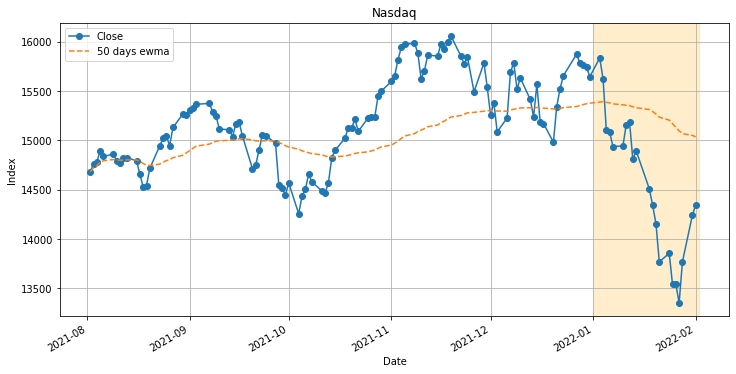

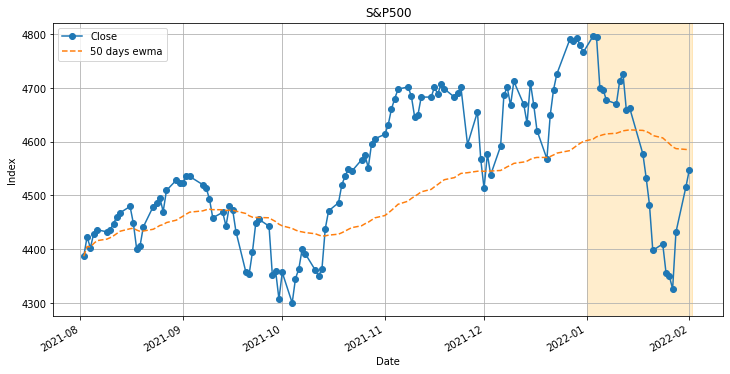

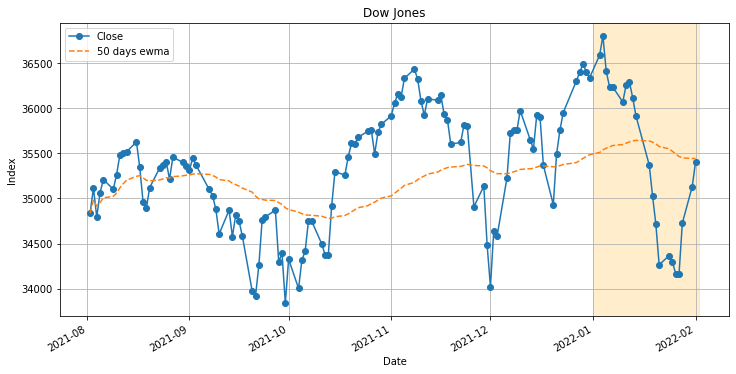

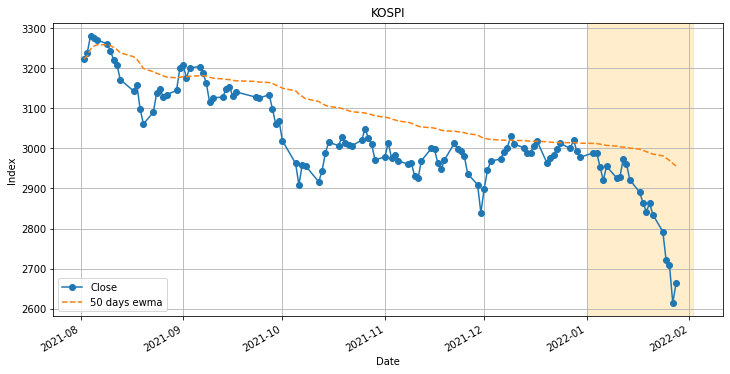

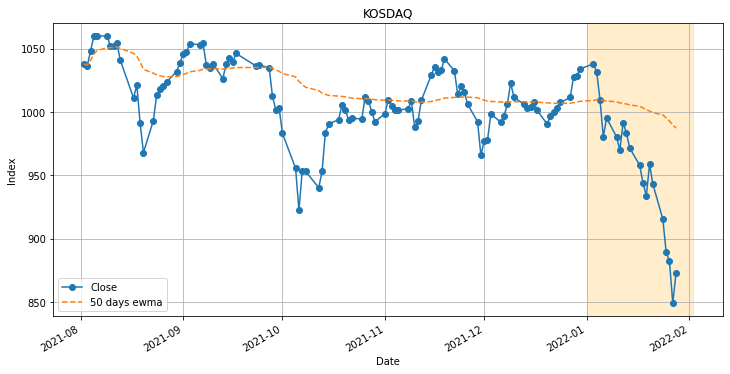

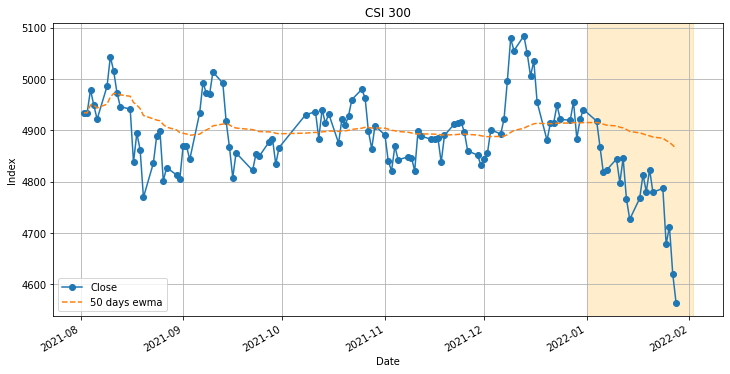

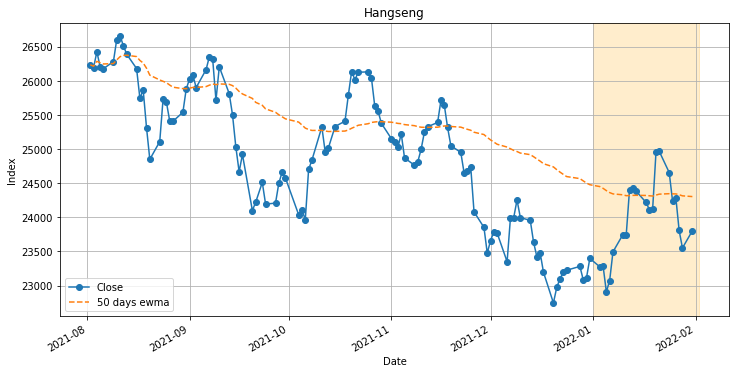

In [9]:
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

start_date='2021-08-01'
end_date=date.today()
print("Displaying from", start_date, " to ", end_date)

for name, code in market_list.items() :
  df = fdr.DataReader(code, start='2021-08-01', data_source='fred')
  df['ewm'] = df['Close'].ewm(50, min_periods=1).mean()
  #plt.figure(figsize=(10, 6))
  df = df[['Close','ewm']]
  ax = df['Close'].plot(marker='o')
  ax = ax.axvspan('2022-01-01', end_date, color='orange', alpha=0.2)
  ax1 = df['ewm'].plot(linestyle='--', label='50 days ewma')
  
  plt.ylabel('Index')
  plt.title(name)
  plt.legend()
  plt.grid(True)
  plt.show()